# Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

### Pros and Cons associated with SVM:

#### Pros:
It works really well with clear margin of separation
It is effective in high dimensional spaces.
It is effective in cases where number of dimensions is greater than the number of samples.
It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

#### Cons:
It doesn’t perform well, when we have large data set because the required training time is higher
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
data=pd.read_csv('C:/Users/Akshat/Desktop/Machine Learning Tutorials/adultdata.txt',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
             'capital_gain','capital_loss','hours_per_week','country','salary']

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(data['salary'].unique())
print(data['sex'].unique())

[' <=50K' ' >50K']
[' Male' ' Female']


### Checking for any null values in our data

In [6]:
data.isnull().values.any()

False

In [7]:
pd.isnull(data).sum()>0

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
country           False
salary            False
dtype: bool

### No null values in our data

### Checking for any duplicate values

In [9]:
data[data.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [15]:
#data[data['age']==19 and data['fnlwgt']==251579]
data.loc[(data.age == 19) & (data['fnlwgt']==251579)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


In [16]:
## There are a lot of duplicates in our data and hence we should drop them

In [17]:
data.shape

(32561, 15)

In [21]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [25]:
data.drop_duplicates(subset=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],inplace=True)

In [26]:
data.shape

(32537, 15)

In [27]:
data['salary']=np.where(data['salary']==' <=50K',0,1)
data['sex']=np.where(data['sex']==' Male',0,1)

In [28]:
data.salary.unique()

array([0, 1], dtype=int64)

In [27]:
data.sex.unique()

array([0, 1], dtype=int64)

In [29]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0


In [37]:
new_data=pd.get_dummies(data)
new_data.head(2)

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,workclass_ ?,workclass_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
data_column=new_data[new_data.columns.difference(['salary'])]
data_output=new_data['salary']

In [35]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [45]:
X=data_column
Y=data_output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)
rf=RandomForestClassifier()
result=rf.fit(X_train,Y_train)
pred=result.predict(X_test)
#f_rf_roc_auc=(roc_auc_score(Y_test, pred))
#f_accu=(metrics.accuracy_score(pred,Y_test))

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(result.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

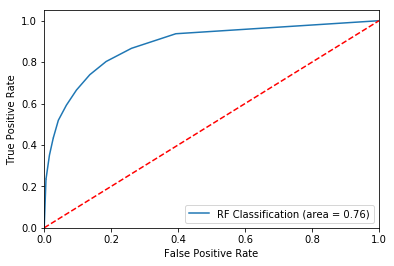

In [13]:
#logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classification (area = %0.2f)' % f_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### Using feature importance in Random Forest

In [49]:
importances.sort_values(by='importance',ascending=True)

,importance
feature,
workclass_ Without-pay,0.000
country_ Vietnam,0.000
country_ Peru,0.000
country_ Honduras,0.000
country_ Trinadad&Tobago,0.000
country_ Holand-Netherlands,0.000
country_ France,0.000
country_ Dominican-Republic,0.000
country_ Columbia,0.000


In [50]:
importances.shape

(107, 1)

In [57]:
importances=importances[importances['importance']>0.007] # seting up this threshold

In [58]:
importances.shape

(20, 1)

### Using RFE on the selected 20 features to identify even more important features

In [60]:
k=np.arange(1,20)
rf_roc_auc=[]
accuracy=[]
for i in k:
    rf = RandomForestClassifier()
    rfe = RFE(rf, i)
    rfe = rfe.fit(data_column[importances.index], data_output)
    b=data_column[importances.index].columns
    a=rfe.support_
    c=pd.DataFrame(a,index=b)
    c=c[c[0]==True]
    X=data_column[c.index]
    Y=data_output
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)
    result=rf.fit(X_train, Y_train)
    pred=result.predict(X_test)
    rf_roc_auc.append(roc_auc_score(Y_test, pred))
    accuracy.append(metrics.accuracy_score(pred,Y_test))

In [61]:
ab=pd.DataFrame(k)
auc=pd.DataFrame(rf_roc_auc)
m=pd.merge(ab,auc,left_index=True,right_index=True)
acc=pd.DataFrame(accuracy)
final=pd.merge(m,acc,left_index=True,right_index=True)

In [62]:
final.columns=['num_features','auc','accuracy']

In [64]:
final.sort_values(by=['auc','accuracy'],ascending=False).head(5)

,num_features,auc,accuracy
15,16,0.763688,0.851055
18,19,0.763498,0.850543
16,17,0.761906,0.847675
13,14,0.759500,0.848699
14,15,0.757108,0.845728


## We are going ahead with 16 features since it's auc and accuracy are highest, with 19 features the accuracy and auc is same , the less features the better

In [76]:
rf = RandomForestClassifier()
rfe = RFE(rf, 16)
rfe = rfe.fit(data_column[importances.index], data_output)
b=data_column[importances.index].columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]
X=data_column[c.index]
Y=data_output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)
result=rf.fit(X_train, Y_train)
pred=result.predict(X_test)
print('auc is ',(roc_auc_score(Y_test, pred)))
print('accuracy is ',metrics.accuracy_score(pred,Y_test))

auc is  0.76040395396
accuracy is  0.848289284983


In [66]:
# 18
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7425
          1       0.73      0.59      0.65      2337

avg / total       0.84      0.85      0.84      9762



In [67]:
# 31 features
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7425
          1       0.73      0.59      0.65      2337

avg / total       0.84      0.85      0.84      9762



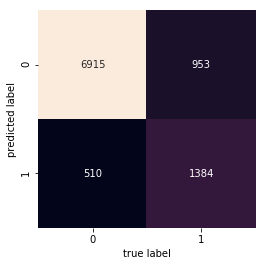

In [68]:
# 18
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Using Bagging instead of RF to test performance

In [72]:
bf=BaggingClassifier(n_estimators=20)
result=bf.fit(X_train,Y_train)
pred=result.predict(X_test)

In [73]:
print((roc_auc_score(Y_test, pred)))
print((metrics.accuracy_score(pred,Y_test)))

0.762274866768
0.845113706208


## Using SVM

In [77]:
from sklearn import svm

In [79]:
model=svm.SVC()
result=model.fit(X_train,Y_train)
pred=result.predict(X_test)

In [80]:
print((roc_auc_score(Y_test, pred)))
print((metrics.accuracy_score(pred,Y_test)))

0.506573566214
0.761012087687


#### Tuning the parameters of SVM for better performance

In [97]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
#k=range(2,10)
c=np.array([1,10,50,100,200,1000])
a=[]
accuracy=[]
for j in c:
    #kfold = model_selection.KFold(n_splits=i, random_state=7)
    modelCV=svm.SVC(C=j)
    scoring = 'accuracy'
    modelCV.fit(X_train,Y_train)
    pred=(modelCV.predict(X_test))
    accuracy.append(metrics.accuracy_score(pred,Y_test))
    

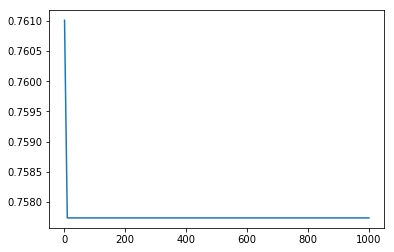

In [100]:
plt.plot(c,accuracy)

In [110]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
#k=range(2,10)
c=np.array([1,10,50,100,200,1000])
g=np.array([0.0001, 0.001, 0.01, 0.1])
a=[]
accuracy=[]
for i in g:
#kfold = model_selection.KFold(n_splits=i, random_state=7)
    modelCV=svm.SVC(C=1,gamma=i)
    scoring = 'accuracy'
    modelCV.fit(X_train,Y_train)
    pred=(modelCV.predict(X_test))
    accuracy.append(metrics.accuracy_score(pred,Y_test))

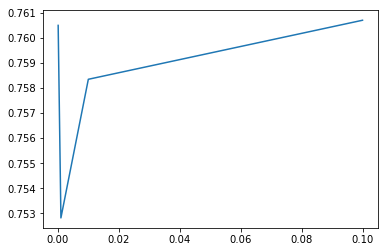

In [111]:
plt.plot(g,accuracy)

## Using above analysis, we can confirm that for SVm the parameters are C=1 and gamma=0.1

# Testing our model on our test data

In [ ]:
svm.SVC()

In [112]:
test=pd.read_csv('C:/Users/Akshat/Desktop/Machine Learning Tutorials/adulttest.txt',header=None)
test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [113]:
test.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
             'capital_gain','capital_loss','hours_per_week','country','salary']

In [114]:
test['sex']=np.where(test['sex']==' Male',0,1)

In [92]:
test.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,>50K.


In [115]:
new_test=pd.get_dummies(test)

In [97]:
new_test.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,salary_ <=50K.,salary_ >50K.
0,25,226802,7,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,0,50,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,0,7688,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,1,0,0,30,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [116]:
X.shape

(32537, 16)

In [117]:
new_test_X=new_test[X.columns] # taking only those columns on which we trained our data
new_test_Y=test['salary']

In [118]:
(new_test_Y)=pd.DataFrame(new_test_Y)
new_test_Y.head()

,salary
0,<=50K.
1,<=50K.
2,>50K.
3,>50K.
4,<=50K.


In [119]:
new_test_Y['salary']=np.where(new_test_Y['salary']==' <=50K.',0,1)

In [120]:
new_test_Y['salary'].unique()

array([0, 1], dtype=int64)

In [125]:
#model_rf=rf.fit(X,Y)
#model_bag=bf.fit(X,Y)
model_svm=svm.SVC(C=1,gamma=0.1,probability=True)
model_svm_result=model_svm.fit(X,Y)

In [126]:
#pred_rf=model_rf.predict(new_test_X)
#pred_bag=model_bag.predict(new_test_X)
pred_svm=model_svm_result.predict(new_test_X)

In [130]:
model_svm_result.predict_proba(new_test_X)

array([[ 0.75882816,  0.24117184],
       [ 0.75882816,  0.24117184],
       [ 0.75882431,  0.24117569],
       ..., 
       [ 0.75882822,  0.24117178],
       [ 0.75882816,  0.24117184],
       [ 0.75882816,  0.24117184]])

In [131]:
model_svm_result.predict_log_proba(new_test_X)

array([[-0.27597993, -1.42224557],
       [-0.27597993, -1.42224557],
       [-0.27598501, -1.4222296 ],
       ..., 
       [-0.27597985, -1.42224583],
       [-0.27597993, -1.42224557],
       [-0.27597993, -1.42224557]])

In [123]:
print('RF accuracy is',metrics.accuracy_score(new_test_Y,pred_rf))
print('Bagging accuracy is',metrics.accuracy_score(new_test_Y,pred_bag))
print('SVM accuracy is',metrics.accuracy_score(new_test_Y,pred_svm))


RF accuracy is 0.849210736441
Bagging accuracy is 0.846569621031
SVM accuracy is 0.763650881395


## As we can see, Accuracy of Random Forest /Bagging is better than SVM

In [124]:
#auc_score=roc_auc_score(new_test_Y,final_pred)
print('RF AUC is',roc_auc_score(new_test_Y,pred_rf))
print('Bagging AUC is',roc_auc_score(new_test_Y,pred_bag))
print('SVM AUC is',roc_auc_score(new_test_Y,pred_svm))

RF AUC is 0.756355764484
Bagging AUC is 0.758847191041
SVM AUC is 0.50431959136


## The AUC score again of RF and Bagging is high, for SVM it's too low

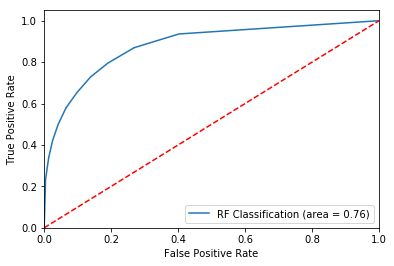

In [125]:
#logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(new_test_Y, rf.predict_proba(new_test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classification (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## The confusion matrix on our test data

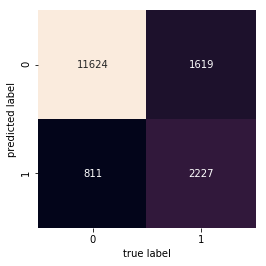

In [126]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(new_test_Y,final_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Classification Report

In [127]:
from sklearn.metrics import classification_report
print(classification_report(new_test_Y,final_pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12435
          1       0.73      0.58      0.65      3846

avg / total       0.84      0.85      0.84     16281

